In [149]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [112]:
data1=pd.read_csv("power_consumption_g3_feat.csv")
data2=pd.read_csv("power_consumption_g3.csv")

In [113]:
data1

Date  Temperature  Humidity  WindSpeed  \
0      2017-03-01 16:40:00        21.33     55.91      0.080   
1      2017-07-27 06:30:00        23.10     48.58      4.908   
2      2017-10-11 19:00:00        23.10     59.82      0.084   
3      2017-02-10 06:50:00        12.25     80.80      4.916   
4      2017-03-06 16:00:00        15.62     59.38      0.075   
...                    ...          ...       ...        ...   
52411  2017-05-14 02:20:00        23.58     43.10      0.075   
52412  2017-11-17 19:20:00        17.30     76.50      0.075   
52413  2017-03-21 12:10:00        17.90     50.28      0.081   
52414  2017-07-28 05:10:00        25.23     61.32      4.907   
52415  2017-12-16 20:30:00        13.90     80.80      0.082   

       GeneralDiffuseFlows  DiffuseFlows  
0                  387.400       427.300  
1                   10.450         8.630  
2                    0.446         0.322  
3                    0.051         0.111  
4                  533.400       579.900  
...                    ...           ...  
52411                0.110         0.122  
52412                0.040         0.148  
52413              837.000       296.700  
52414                0.091         0.119  
52415                0.051         0.152  

[52416 rows x 6 columns]

In [114]:
data2

Date   SolarPower
0      2017-06-22 11:50:00  35818.80795
1      2017-04-24 22:50:00  34628.20237
2      2017-11-05 09:00:00  22781.53846
3      2017-10-19 23:20:00  31925.77681
4      2017-03-25 17:10:00  30246.12766
...                    ...          ...
52411  2017-02-08 16:10:00  31808.13559
52412  2017-07-04 17:40:00  35816.61130
52413  2017-07-02 17:00:00  31185.64784
52414  2017-08-02 16:40:00  39463.35183
52415  2017-04-28 00:50:00  25978.90205

[52416 rows x 2 columns]

In [115]:
data1=data1.sort_values(['Date'])
data2=data2.sort_values(['Date'])

In [116]:
data1

Date  Temperature  Humidity  WindSpeed  \
37462  2017-01-01 00:00:00        6.559      73.8      0.083   
37635  2017-01-01 00:10:00        6.414      74.5      0.083   
19407  2017-01-01 00:20:00        6.313      74.5      0.080   
17609  2017-01-01 00:30:00        6.121      75.0      0.083   
27906  2017-01-01 00:40:00        5.921      75.7      0.081   
...                    ...          ...       ...        ...   
22761  2017-12-30 23:10:00        7.010      72.4      0.080   
45762  2017-12-30 23:20:00        6.947      72.6      0.082   
13568  2017-12-30 23:30:00        6.900      72.8      0.086   
23742  2017-12-30 23:40:00        6.758      73.0      0.080   
37018  2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  
37462                0.051         0.119  
37635                0.070         0.085  
19407                0.062         0.100  
17609                0.091         0.096  
27906                0.048         0.085  
...                    ...           ...  
22761                  NaN         0.096  
45762                0.051         0.093  
13568                0.084         0.074  
23742                0.066         0.089  
37018                0.062         0.111  

[52416 rows x 6 columns]

In [117]:
data2

Date   SolarPower
32131  2017-01-01 00:00:00  34055.69620
46287  2017-01-01 00:10:00  29814.68354
16887  2017-01-01 00:20:00  29128.10127
16579  2017-01-01 00:30:00  28228.86076
22017  2017-01-01 00:40:00  27335.69620
...                    ...          ...
19299  2017-12-30 23:10:00  31160.45627
46779  2017-12-30 23:20:00  30430.41825
45596  2017-12-30 23:30:00  29590.87452
2144   2017-12-30 23:40:00  28958.17490
30077  2017-12-30 23:50:00  28349.80989

[52416 rows x 2 columns]

In [118]:
data=pd.merge(data1, data2, on="Date")
data


Date  Temperature  Humidity  WindSpeed  \
0      2017-01-01 00:00:00        6.559      73.8      0.083   
1      2017-01-01 00:10:00        6.414      74.5      0.083   
2      2017-01-01 00:20:00        6.313      74.5      0.080   
3      2017-01-01 00:30:00        6.121      75.0      0.083   
4      2017-01-01 00:40:00        5.921      75.7      0.081   
...                    ...          ...       ...        ...   
52411  2017-12-30 23:10:00        7.010      72.4      0.080   
52412  2017-12-30 23:20:00        6.947      72.6      0.082   
52413  2017-12-30 23:30:00        6.900      72.8      0.086   
52414  2017-12-30 23:40:00        6.758      73.0      0.080   
52415  2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows   SolarPower  
0                    0.051         0.119  34055.69620  
1                    0.070         0.085  29814.68354  
2                    0.062         0.100  29128.10127  
3                    0.091         0.096  28228.86076  
4                    0.048         0.085  27335.69620  
...                    ...           ...          ...  
52411                  NaN         0.096  31160.45627  
52412                0.051         0.093  30430.41825  
52413                0.084         0.074  29590.87452  
52414                0.066         0.089  28958.17490  
52415                0.062         0.111  28349.80989  

[52416 rows x 7 columns]

In [119]:
data.isnull().sum()

Date                     0
Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [120]:
data.isnull().sum() / len(data) * 100

Date                   0.000000
Temperature            1.066468
Humidity               0.951999
WindSpeed              1.009234
GeneralDiffuseFlows    0.999695
DiffuseFlows           0.963446
SolarPower             0.000000
dtype: float64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'GeneralDiffuseFlows'}>],
       [<Axes: title={'center': 'DiffuseFlows'}>,
        <Axes: title={'center': 'SolarPower'}>]], dtype=object)

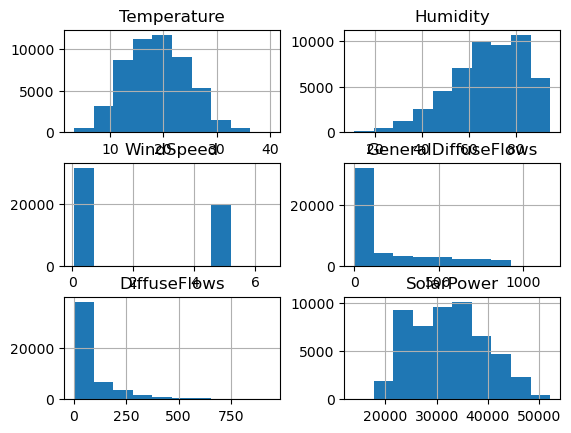

In [121]:
data.hist()

In [122]:
data.Temperature=data.Temperature.fillna(data.Temperature.mean())

In [123]:
data.isnull().sum()

Date                     0
Temperature              0
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [124]:
data.GeneralDiffuseFlows=data.GeneralDiffuseFlows.fillna(data.GeneralDiffuseFlows.median())
data.DiffuseFlows=data.DiffuseFlows.fillna(data.DiffuseFlows.median())

In [125]:
scaler=MinMaxScaler()

scaled_data=scaler.fit_transform(data[['WindSpeed', 'Humidity']])
imputer=KNNImputer(n_neighbors=5)
imputed_data=imputer.fit_transform(scaled_data)
imputed_data=scaler.inverse_transform(imputed_data)
data[['WindSpeed', 'Humidity']]=imputed_data

In [126]:
data.isnull().sum()

Date                   0
Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [133]:
data.dtypes

Date                   datetime64[ns]
Temperature                   float64
Humidity                      float64
WindSpeed                     float64
GeneralDiffuseFlows           float64
DiffuseFlows                  float64
SolarPower                    float64
dtype: object

In [128]:
data

Date  Temperature  Humidity  WindSpeed  \
0      2017-01-01 00:00:00        6.559      73.8      0.083   
1      2017-01-01 00:10:00        6.414      74.5      0.083   
2      2017-01-01 00:20:00        6.313      74.5      0.080   
3      2017-01-01 00:30:00        6.121      75.0      0.083   
4      2017-01-01 00:40:00        5.921      75.7      0.081   
...                    ...          ...       ...        ...   
52411  2017-12-30 23:10:00        7.010      72.4      0.080   
52412  2017-12-30 23:20:00        6.947      72.6      0.082   
52413  2017-12-30 23:30:00        6.900      72.8      0.086   
52414  2017-12-30 23:40:00        6.758      73.0      0.080   
52415  2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows   SolarPower  
0                    0.051         0.119  34055.69620  
1                    0.070         0.085  29814.68354  
2                    0.062         0.100  29128.10127  
3                    0.091         0.096  28228.86076  
4                    0.048         0.085  27335.69620  
...                    ...           ...          ...  
52411                5.036         0.096  31160.45627  
52412                0.051         0.093  30430.41825  
52413                0.084         0.074  29590.87452  
52414                0.066         0.089  28958.17490  
52415                0.062         0.111  28349.80989  

[52416 rows x 7 columns]

In [135]:
# data['Date']=pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)
data= data.resample('2h').mean()
data

Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
Date                                                                          
2017-01-01 00:00:00     6.952890  76.250500   0.081917             0.060167   
2017-01-01 02:00:00     5.029333  78.008333   0.082583             0.061417   
2017-01-01 04:00:00     4.919667  74.641667   0.081667             0.061917   
2017-01-01 06:00:00     4.512750  74.575000   0.082417             0.063583   
2017-01-01 08:00:00     4.632167  73.791667   0.082417            79.281917   
...                          ...        ...        ...                  ...   
2017-12-30 14:00:00    14.513333  41.480500   0.077667           409.650000   
2017-12-30 16:00:00    14.015000  44.918000   0.077500           153.905000   
2017-12-30 18:00:00    10.112500  60.637167   0.075583             1.618917   
2017-12-30 20:00:00     8.526667  66.832500   0.080917             0.062917   
2017-12-30 22:00:00     7.237917  71.607500   0.081667             0.475833   

                     DiffuseFlows    SolarPower  
Date                                             
2017-01-01 00:00:00      0.105667  26927.594937  
2017-01-01 02:00:00      0.135083  21447.088607  
2017-01-01 04:00:00      0.120833  20641.518987  
2017-01-01 06:00:00      0.122500  20094.683545  
2017-01-01 08:00:00     15.761833  21255.189872  
...                           ...           ...  
2017-12-30 14:00:00     42.163333  29293.789606  
2017-12-30 16:00:00    152.368333  31262.864386  
2017-12-30 18:00:00      1.676750  37721.673005  
2017-12-30 20:00:00      0.101667  36183.523447  
2017-12-30 22:00:00      0.100417  32050.697084  

[4368 rows x 6 columns]

In [136]:
data.reset_index('Date', inplace=True)

In [137]:
data

Date  Temperature   Humidity  WindSpeed  \
0    2017-01-01 00:00:00     6.952890  76.250500   0.081917   
1    2017-01-01 02:00:00     5.029333  78.008333   0.082583   
2    2017-01-01 04:00:00     4.919667  74.641667   0.081667   
3    2017-01-01 06:00:00     4.512750  74.575000   0.082417   
4    2017-01-01 08:00:00     4.632167  73.791667   0.082417   
...                  ...          ...        ...        ...   
4363 2017-12-30 14:00:00    14.513333  41.480500   0.077667   
4364 2017-12-30 16:00:00    14.015000  44.918000   0.077500   
4365 2017-12-30 18:00:00    10.112500  60.637167   0.075583   
4366 2017-12-30 20:00:00     8.526667  66.832500   0.080917   
4367 2017-12-30 22:00:00     7.237917  71.607500   0.081667   

      GeneralDiffuseFlows  DiffuseFlows    SolarPower  
0                0.060167      0.105667  26927.594937  
1                0.061417      0.135083  21447.088607  
2                0.061917      0.120833  20641.518987  
3                0.063583      0.122500  20094.683545  
4               79.281917     15.761833  21255.189872  
...                   ...           ...           ...  
4363           409.650000     42.163333  29293.789606  
4364           153.905000    152.368333  31262.864386  
4365             1.618917      1.676750  37721.673005  
4366             0.062917      0.101667  36183.523447  
4367             0.475833      0.100417  32050.697084  

[4368 rows x 7 columns]

In [138]:
for lag in range(1, 5):  # Lags for the last 4 intervals
    data[f'lag_{lag}'] = data['SolarPower'].shift(lag)

In [139]:
data

Date  Temperature   Humidity  WindSpeed  \
0    2017-01-01 00:00:00     6.952890  76.250500   0.081917   
1    2017-01-01 02:00:00     5.029333  78.008333   0.082583   
2    2017-01-01 04:00:00     4.919667  74.641667   0.081667   
3    2017-01-01 06:00:00     4.512750  74.575000   0.082417   
4    2017-01-01 08:00:00     4.632167  73.791667   0.082417   
...                  ...          ...        ...        ...   
4363 2017-12-30 14:00:00    14.513333  41.480500   0.077667   
4364 2017-12-30 16:00:00    14.015000  44.918000   0.077500   
4365 2017-12-30 18:00:00    10.112500  60.637167   0.075583   
4366 2017-12-30 20:00:00     8.526667  66.832500   0.080917   
4367 2017-12-30 22:00:00     7.237917  71.607500   0.081667   

      GeneralDiffuseFlows  DiffuseFlows    SolarPower         lag_1  \
0                0.060167      0.105667  26927.594937           NaN   
1                0.061417      0.135083  21447.088607  26927.594937   
2                0.061917      0.120833  20641.518987  21447.088607   
3                0.063583      0.122500  20094.683545  20641.518987   
4               79.281917     15.761833  21255.189872  20094.683545   
...                   ...           ...           ...           ...   
4363           409.650000     42.163333  29293.789606  30490.240812   
4364           153.905000    152.368333  31262.864386  29293.789606   
4365             1.618917      1.676750  37721.673005  31262.864386   
4366             0.062917      0.101667  36183.523447  37721.673005   
4367             0.475833      0.100417  32050.697084  36183.523447   

             lag_2         lag_3         lag_4  
0              NaN           NaN           NaN  
1              NaN           NaN           NaN  
2     26927.594937           NaN           NaN  
3     21447.088607  26927.594937           NaN  
4     20641.518987  21447.088607  26927.594937  
...            ...           ...           ...  
4363  29649.683142  23720.152091  21307.984791  
4364  30490.240812  29649.683142  23720.152091  
4365  29293.789606  30490.240812  29649.683142  
4366  31262.864386  29293.789606  30490.240812  
4367  37721.673005  31262.864386  29293.789606  

[4368 rows x 11 columns]

In [210]:
data1=data.copy()

In [211]:
data1.dropna(axis=0, inplace=True)

In [212]:
data1

Date  Temperature   Humidity  WindSpeed  \
4    2017-01-01 08:00:00     4.632167  73.791667   0.082417   
5    2017-01-01 10:00:00     8.019333  63.835833   2.913333   
6    2017-01-01 12:00:00    15.263333  57.075000   0.076167   
7    2017-01-01 14:00:00    15.662500  56.914167   0.075667   
8    2017-01-01 16:00:00    15.309167  59.112500   0.077250   
...                  ...          ...        ...        ...   
4363 2017-12-30 14:00:00    14.513333  41.480500   0.077667   
4364 2017-12-30 16:00:00    14.015000  44.918000   0.077500   
4365 2017-12-30 18:00:00    10.112500  60.637167   0.075583   
4366 2017-12-30 20:00:00     8.526667  66.832500   0.080917   
4367 2017-12-30 22:00:00     7.237917  71.607500   0.081667   

      GeneralDiffuseFlows  DiffuseFlows    SolarPower         lag_1  \
4               79.281917     15.761833  21255.189872  20094.683545   
5              317.653000     34.108333  27986.835442  21255.189872   
6              486.391667     40.981667  30060.759495  27986.835442   
7              377.458333     48.125000  29558.481012  30060.759495   
8              160.075833    169.773333  31576.708860  29558.481012   
...                   ...           ...           ...           ...   
4363           409.650000     42.163333  29293.789606  30490.240812   
4364           153.905000    152.368333  31262.864386  29293.789606   
4365             1.618917      1.676750  37721.673005  31262.864386   
4366             0.062917      0.101667  36183.523447  37721.673005   
4367             0.475833      0.100417  32050.697084  36183.523447   

             lag_2         lag_3         lag_4  
4     20641.518987  21447.088607  26927.594937  
5     20094.683545  20641.518987  21447.088607  
6     21255.189872  20094.683545  20641.518987  
7     27986.835442  21255.189872  20094.683545  
8     30060.759495  27986.835442  21255.189872  
...            ...           ...           ...  
4363  29649.683142  23720.152091  21307.984791  
4364  30490.240812  29649.683142  23720.152091  
4365  29293.789606  30490.240812  29649.683142  
4366  31262.864386  29293.789606  30490.240812  
4367  37721.673005  31262.864386  29293.789606  

[4364 rows x 11 columns]

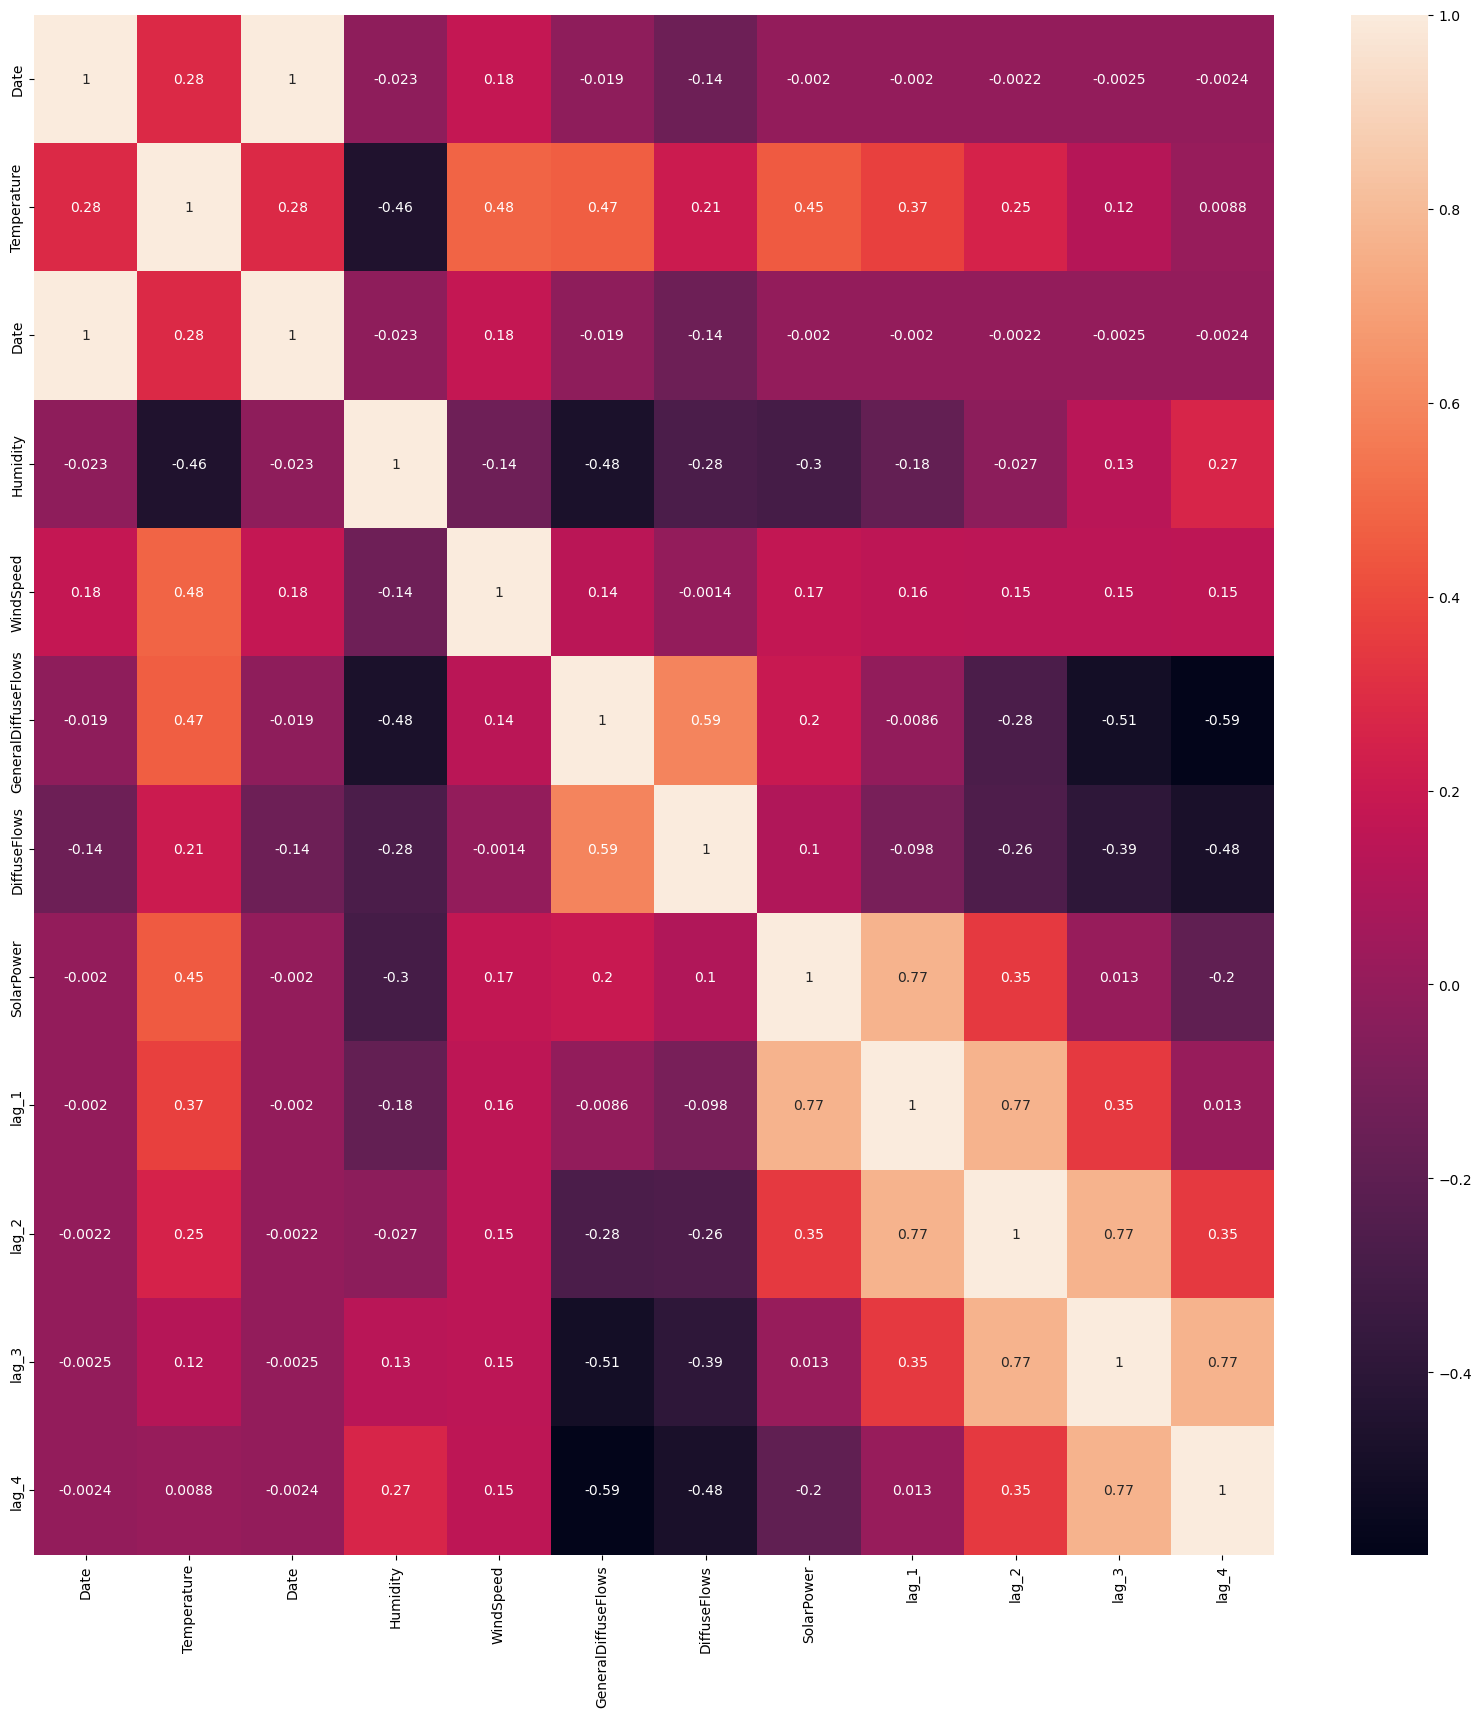

In [213]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[['Date', 'Temperature', 'Date', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'SolarPower', 'lag_1', 'lag_2', 'lag_3', 'lag_4']].corr(), annot=True)
plt.show()

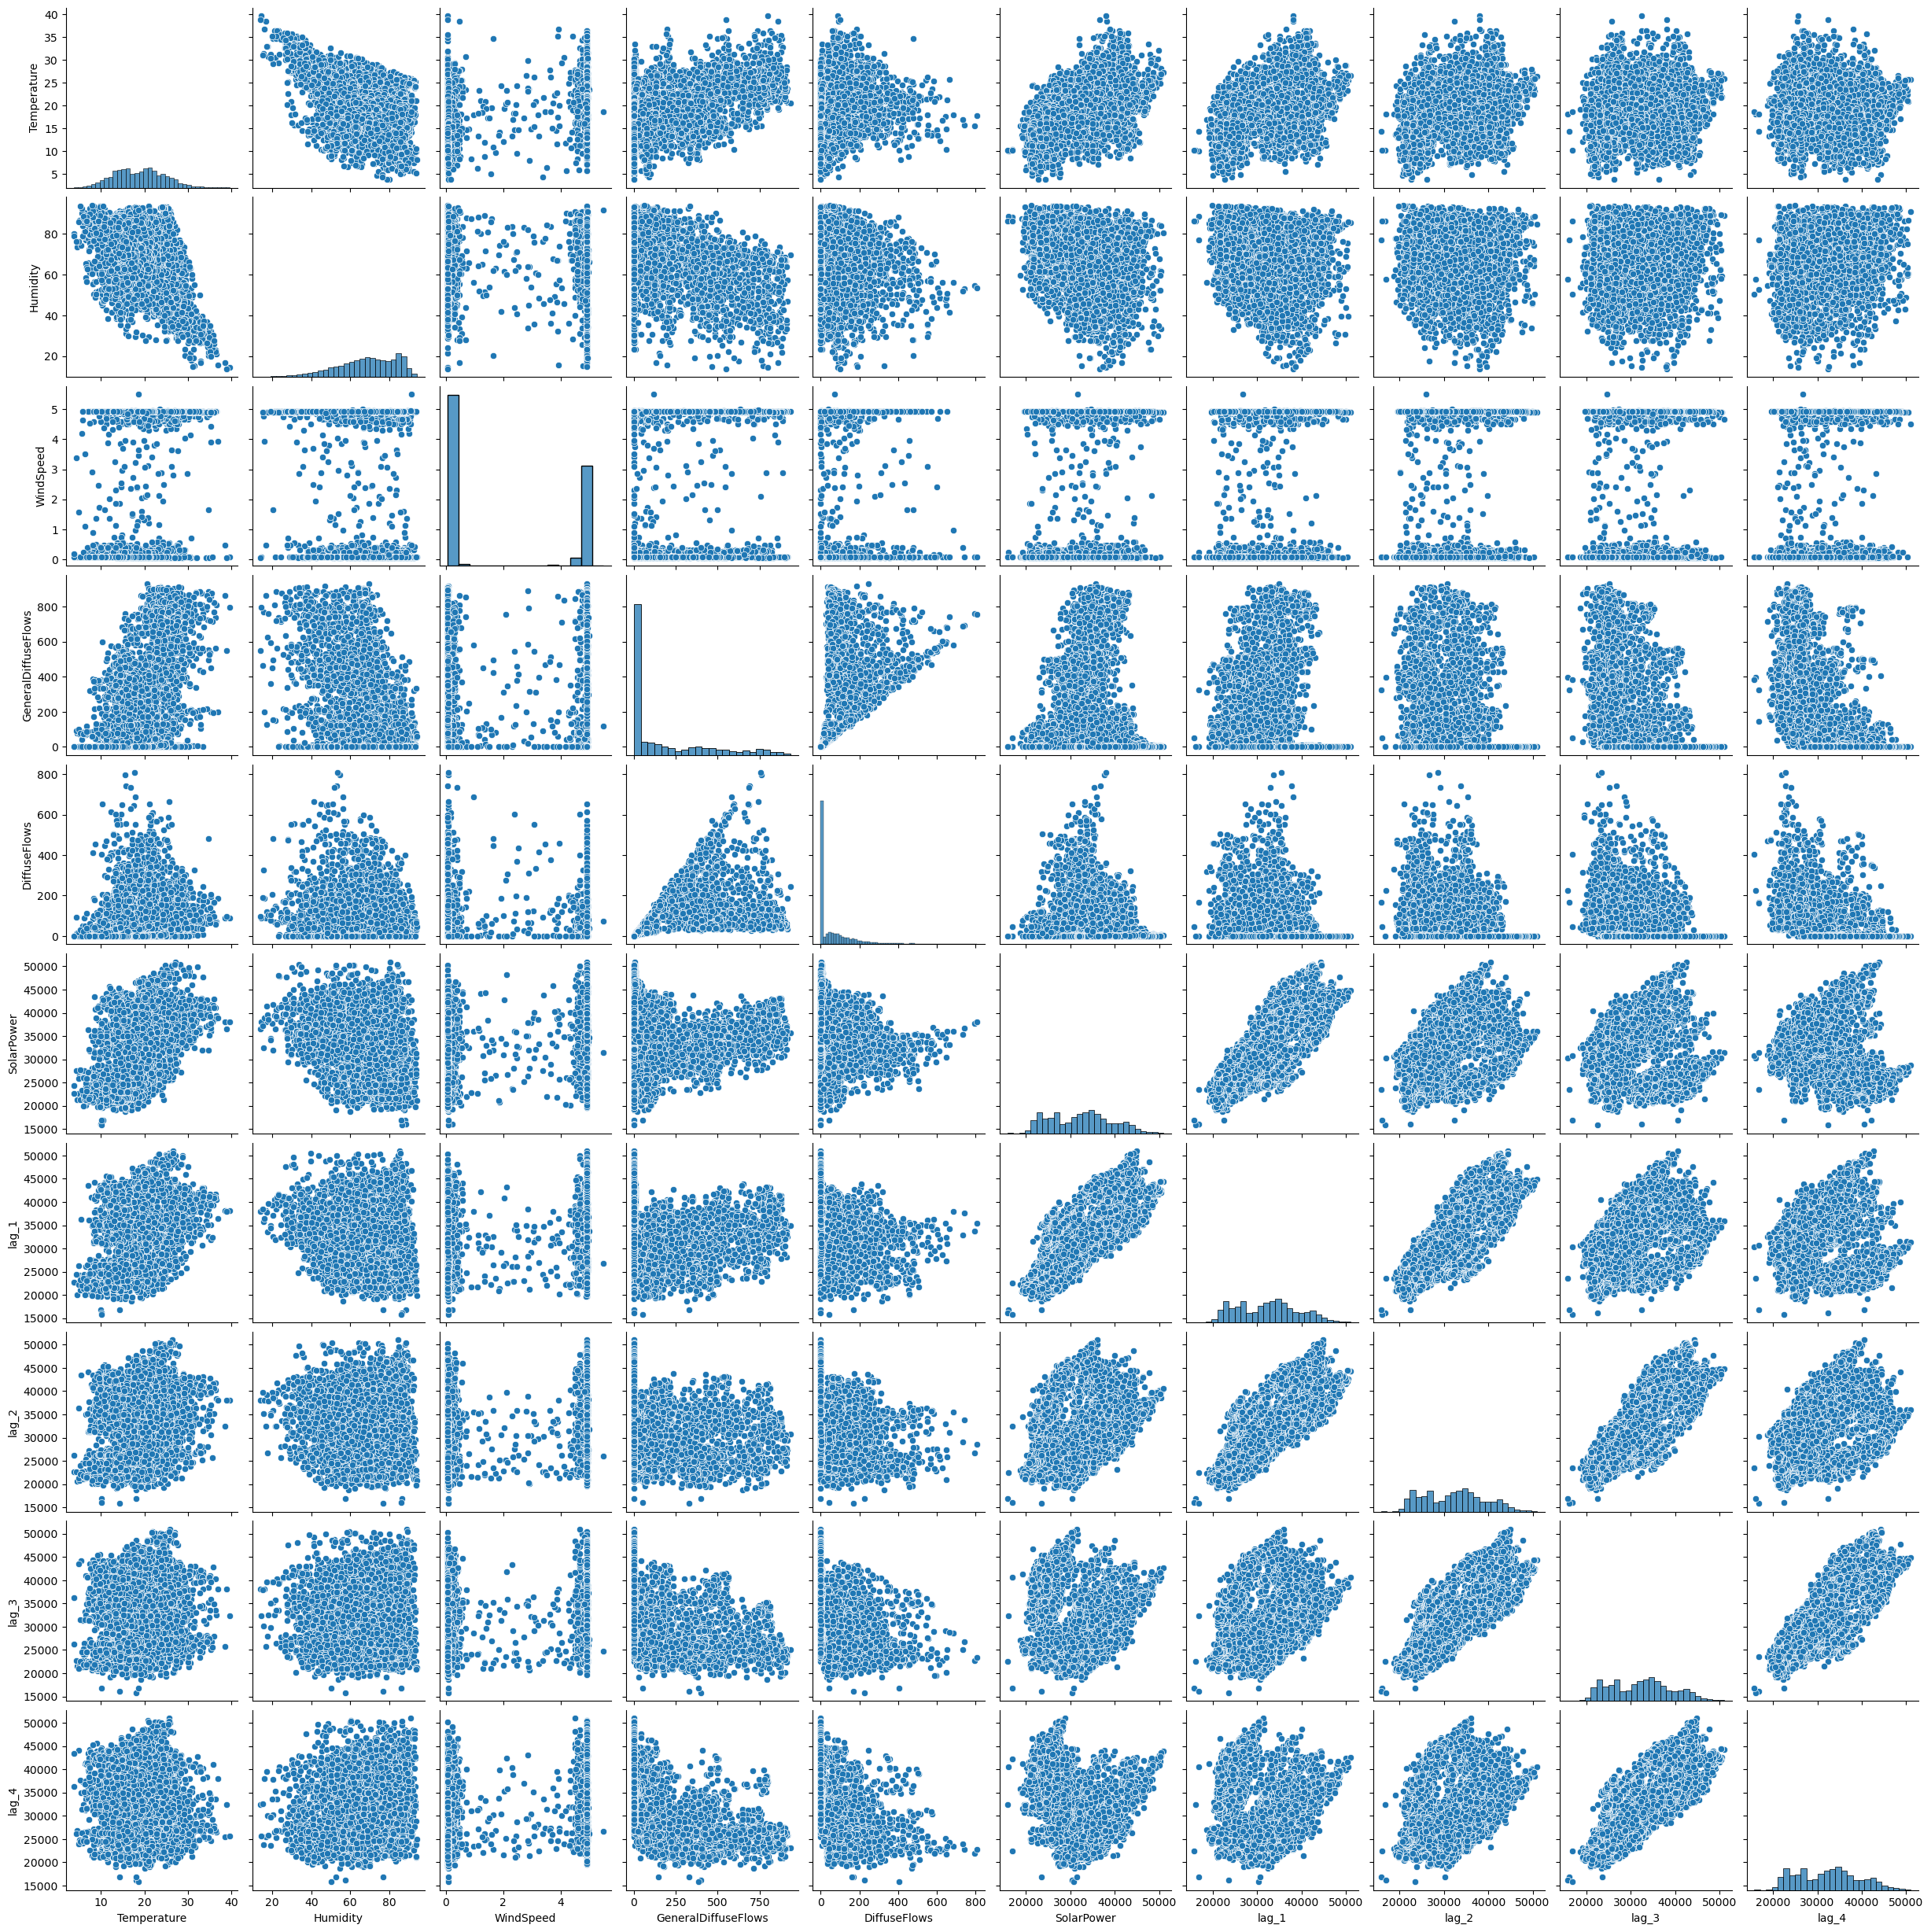

In [214]:
# data1=data1.drop(['Temperature', 'Date', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows'], axis=1)
# data1

data1
sns.pairplot(data1)




In [215]:
X=data1.drop(['Temperature', 'Date', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'SolarPower'], axis=1)
Y=data1['SolarPower']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

In [216]:
data1

Date  Temperature   Humidity  WindSpeed  \
4    2017-01-01 08:00:00     4.632167  73.791667   0.082417   
5    2017-01-01 10:00:00     8.019333  63.835833   2.913333   
6    2017-01-01 12:00:00    15.263333  57.075000   0.076167   
7    2017-01-01 14:00:00    15.662500  56.914167   0.075667   
8    2017-01-01 16:00:00    15.309167  59.112500   0.077250   
...                  ...          ...        ...        ...   
4363 2017-12-30 14:00:00    14.513333  41.480500   0.077667   
4364 2017-12-30 16:00:00    14.015000  44.918000   0.077500   
4365 2017-12-30 18:00:00    10.112500  60.637167   0.075583   
4366 2017-12-30 20:00:00     8.526667  66.832500   0.080917   
4367 2017-12-30 22:00:00     7.237917  71.607500   0.081667   

      GeneralDiffuseFlows  DiffuseFlows    SolarPower         lag_1  \
4               79.281917     15.761833  21255.189872  20094.683545   
5              317.653000     34.108333  27986.835442  21255.189872   
6              486.391667     40.981667  30060.759495  27986.835442   
7              377.458333     48.125000  29558.481012  30060.759495   
8              160.075833    169.773333  31576.708860  29558.481012   
...                   ...           ...           ...           ...   
4363           409.650000     42.163333  29293.789606  30490.240812   
4364           153.905000    152.368333  31262.864386  29293.789606   
4365             1.618917      1.676750  37721.673005  31262.864386   
4366             0.062917      0.101667  36183.523447  37721.673005   
4367             0.475833      0.100417  32050.697084  36183.523447   

             lag_2         lag_3         lag_4  
4     20641.518987  21447.088607  26927.594937  
5     20094.683545  20641.518987  21447.088607  
6     21255.189872  20094.683545  20641.518987  
7     27986.835442  21255.189872  20094.683545  
8     30060.759495  27986.835442  21255.189872  
...            ...           ...           ...  
4363  29649.683142  23720.152091  21307.984791  
4364  30490.240812  29649.683142  23720.152091  
4365  29293.789606  30490.240812  29649.683142  
4366  31262.864386  29293.789606  30490.240812  
4367  37721.673005  31262.864386  29293.789606  

[4364 rows x 11 columns]

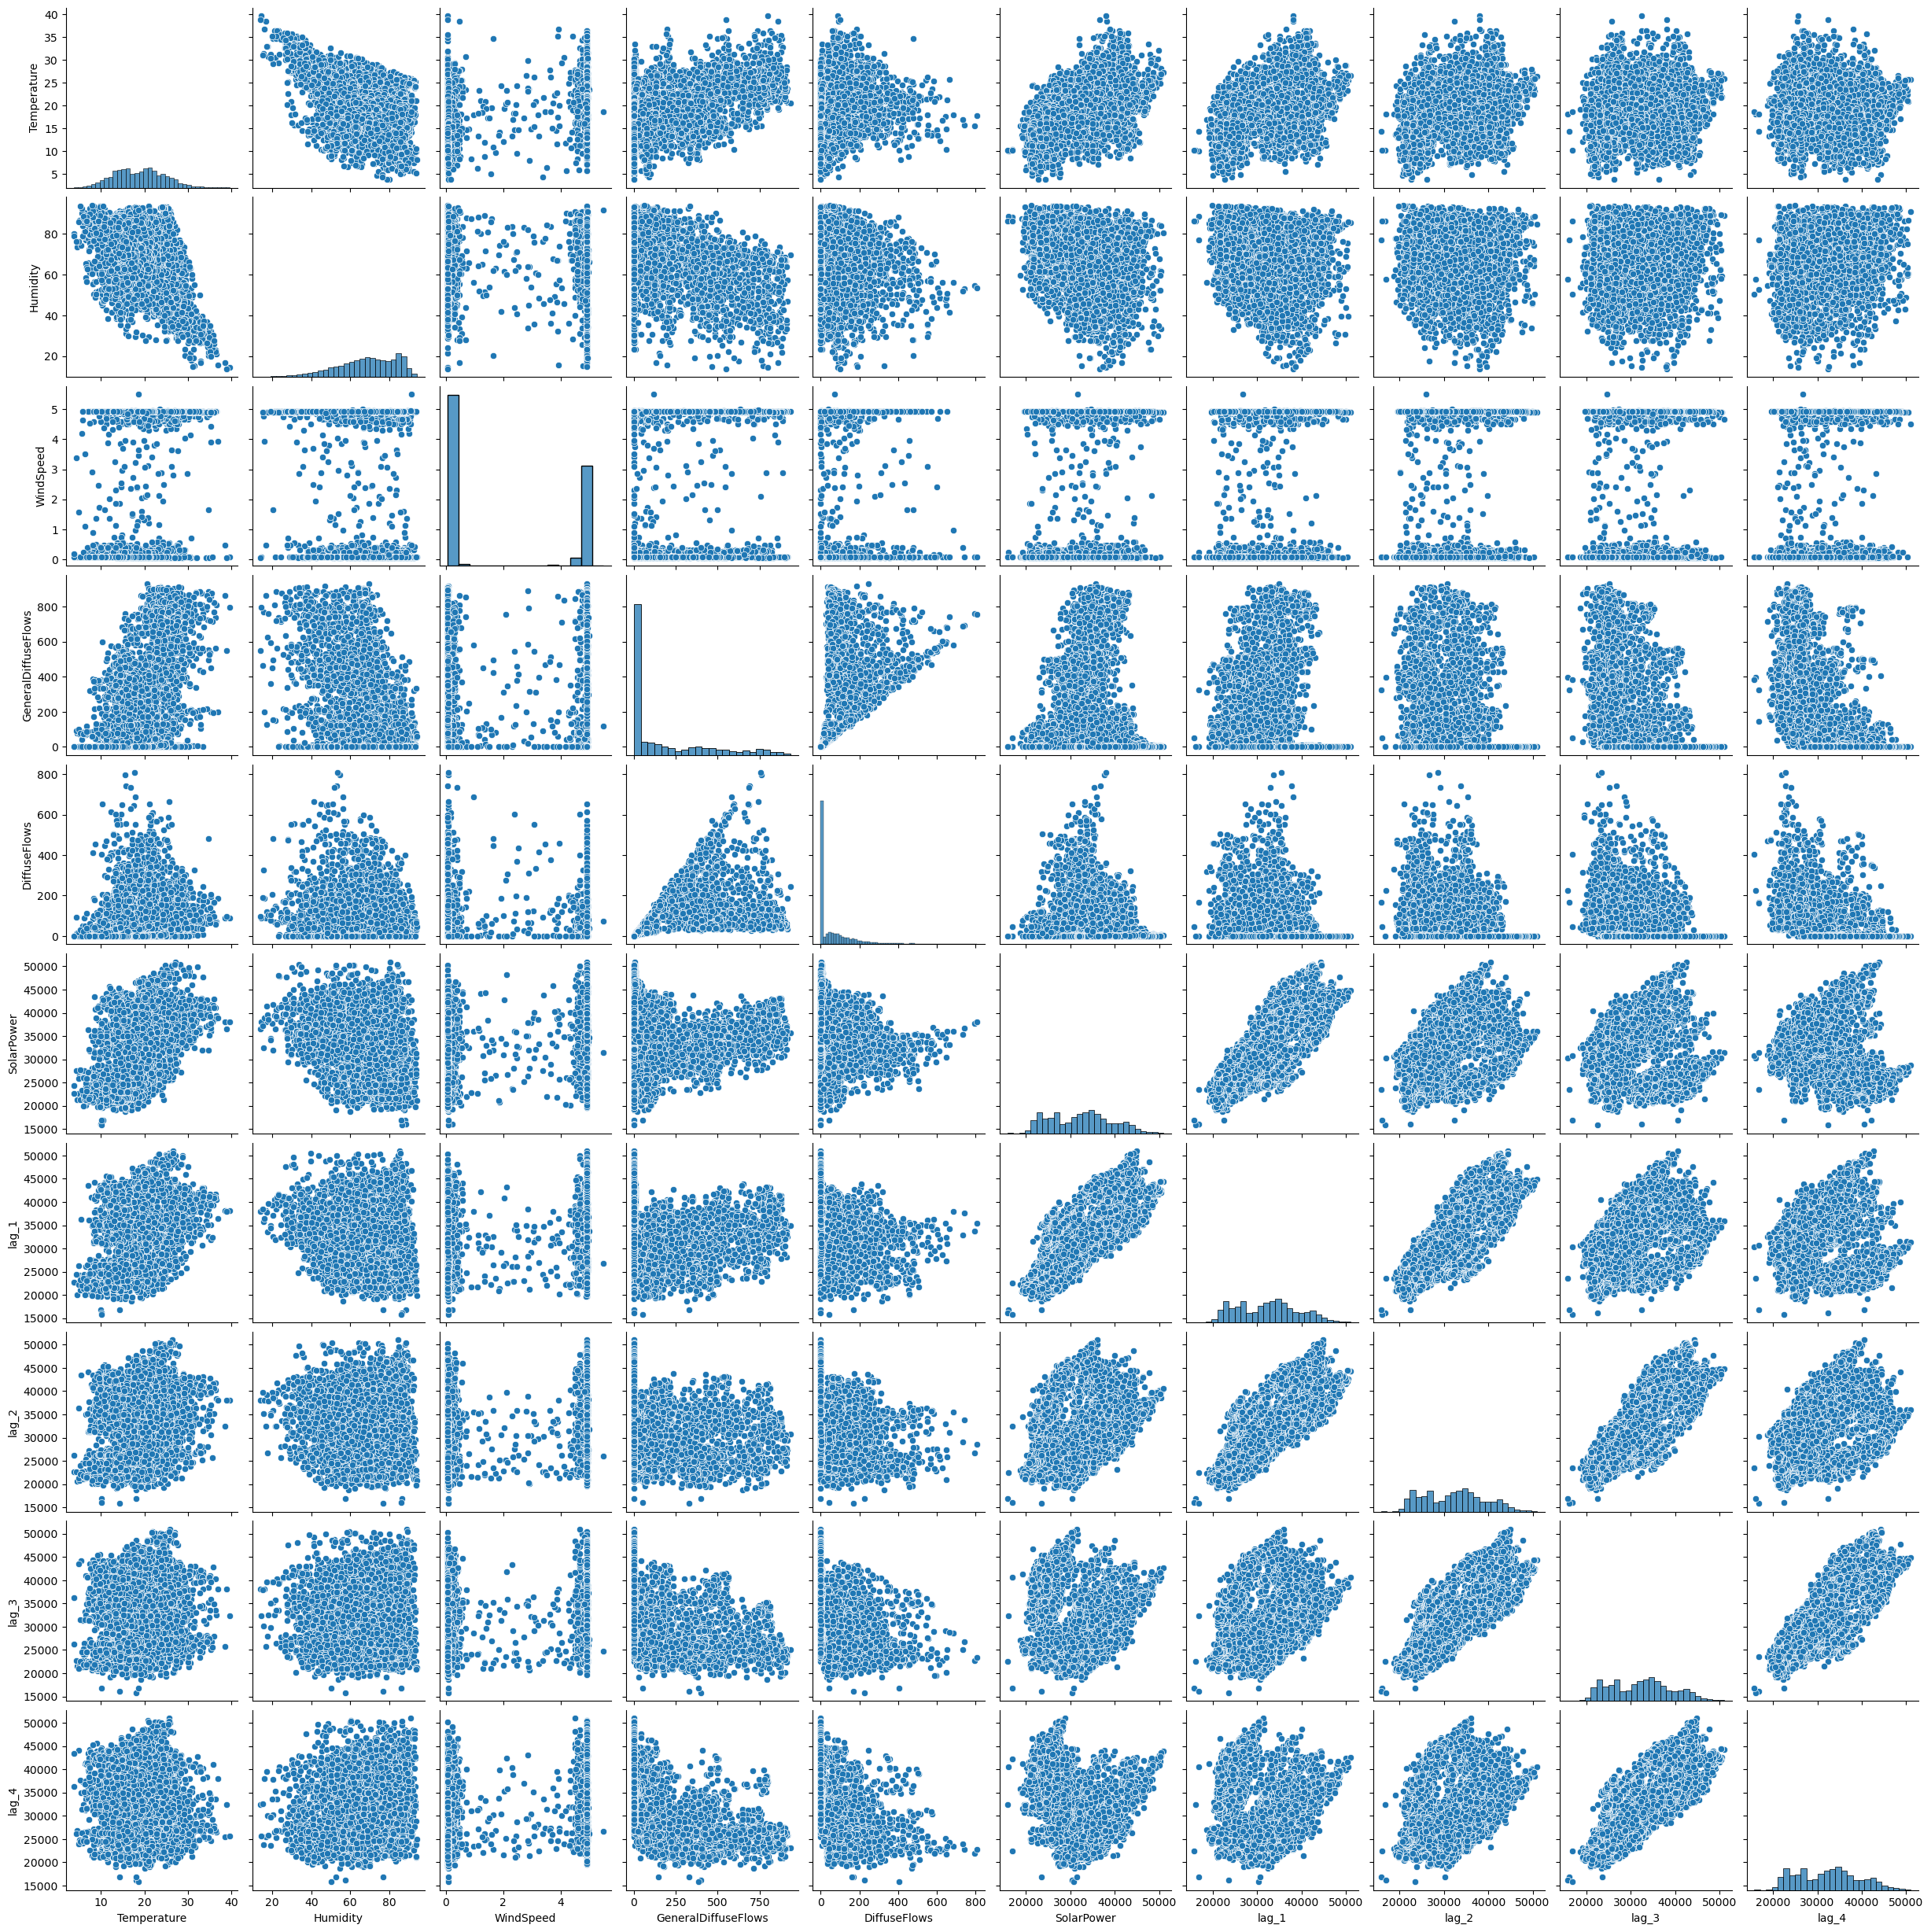

In [217]:
sns.pairplot(data1)

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
model=LinearRegression()

model.fit(X_train, Y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

r2_score(Y_test, y_pred)

0.7903647559513831

In [223]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# scalerY=StandardScaler()
# Y_train=scalerY.fit_transform(Y_train)
# Y_test=scalerY.transform(Y_test)
scalerY = StandardScaler()
Y_train = scalerY.fit_transform(Y_train)  # Reshape to 2D for scaling
Y_test = scalerY.transform(Y_test)

model=DecisionTreeRegressor()

model.fit(X_train, Y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

r2_score(Y_test, y_pred)

In [222]:
model=XGBRegressor()

model.fit(X_train, Y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

r2_score(Y_test, y_pred)

0.9527207519775559

In [224]:
model=XGBRegressor()
param_grid = {
    'learning_rate' :[0.1,0.9,0.5],
    'colsample_bylevel': [0.6,0.7,0.8],
    'max_depth' :[2, 3]
}

cv=GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

cv.fit(X_train, Y_train)

model=cv.best_estimator_

model.fit(X_train, Y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

r2_score(Y_test, y_pred)

0.9415118058459708